In [ ]:
import random
import nltk
from nltk import word_tokenize
from nltk.corpus import stopwords
from nltk.tokenize import RegexpTokenizer 
from bs4 import BeautifulSoup
import re
import pandas as pd
import numpy as np
import string
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
from urllib  import request
from sklearn.model_selection import train_test_split

nltk.download('gutenberg')
nltk.download('stopwords')
nltk.download('wordnet')

stop_words = set(stopwords.words("english"))

[nltk_data] Downloading package gutenberg to /root/nltk_data...
[nltk_data]   Unzipping corpora/gutenberg.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.


mmmmm

*   List item
*   List item




```
# This is formatted as code
```



In [ ]:
import random
h=random.choice([20,40,60])
h

40

# 1. Data Preparation


In [ ]:
Books = []

URLs = []
URLs.append("http://www.gutenberg.org/files/2554/2554-0.txt")
URLs.append("https://www.gutenberg.org/files/3790/3790.txt")
URLs.append("https://www.gutenberg.org/files/14975/14975.txt")
URLs.append("https://www.gutenberg.org/files/22747/22747-0.txt")
URLs.append("https://www.gutenberg.org/files/65407/65407-0.txt")

for url in URLs:
  Books.append(request.urlopen(url).read().decode('utf8'))

1.1) Cleanse
- remove stop words
- remove unnecessary duplicated words
- remove punctuation
1.2) Feature Engineering



In [ ]:
author_Names = []
for book in Books:
  author_Names.append(re.findall(r'Author:\s(.(\w+|.)+)', book)[0][0][:-1])

print(author_Names)  

['Fyodor Dostoevsky', 'George Bernard Shaw', 'Ida B. Wells-Barnett', 'Sam Vaknin', 'Paul Bourget']


In [ ]:
author_Names

['Fyodor Dostoevsky',
 'George Bernard Shaw',
 'Ida B. Wells-Barnett',
 'Sam Vaknin',
 'Paul Bourget']

In [ ]:
part_200 = []
new_words = []
NewWords = []
ps = nltk.stem.porter.PorterStemmer()
lem = nltk.stem.wordnet.WordNetLemmatizer()

# For loop for 200 partions random and each partion contain 100 words 
# preprocess data (text of book) with regex to remove special char
# not in stop_words
tokenizer = RegexpTokenizer("[\w']+")

for book in Books:
  words = re.sub(r'[^\w\s]', '', str(book).lower().strip())
  words = tokenizer.tokenize(words) 

  new_words = []
  for word in words:
      if (word not in stop_words):
          new_words.append(word)

  NewWords = []
  for i in new_words:
      s = ps.stem(i)
      NewWords.append(s)

  for x in range( 200):
      rand =  random.randint(200 , len(NewWords)-3000  )
      partition = NewWords[ rand : rand+100 ]
      
      part_200.append( (' '.join(partition), re.findall(r'Author:\s(.(\w+|.)+)', book)[0][0][:-1]) )

In [ ]:
df = pd.DataFrame(part_200 , columns=['Sample', 'Author'])
print(df)

                                                Sample             Author
0    serv two year cavalri knock petersburg marri m...  Fyodor Dostoevsky
1    simpli defend rush first nail pull whisker per...  Fyodor Dostoevsky
2    go bed two home dont know thank either raskoln...  Fyodor Dostoevsky
3    torn bespatt brimless bent one side unseemli f...  Fyodor Dostoevsky
4    answer reluctantli set luzhin man money doesnt...  Fyodor Dostoevsky
..                                                 ...                ...
995  acknowledg guilt today motiv modesti hypocrisi...       Paul Bourget
996  love proof greatli desir held fast would let g...       Paul Bourget
997  elev feel made one undeceiv quest forget would...       Paul Bourget
998  aspect thing similar accustom alfr involuntari...       Paul Bourget
999  presenc man deceiv simpl nake human sufferingt...       Paul Bourget

[1000 rows x 2 columns]


#  2. Data Transformation

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(df['Sample'],df['Author'],test_size=0.2, random_state=0)

- BOW
- TF-IDF
- n-gram
- LDA
- Word-embedding
  
     
# - **Doc2Vec**

In [ ]:
text = [
  'There was a man',
  'The man had a dog',
  'The dog and the man walked',
  "the sad part is that the arrow and i both dig on flicks like this ",
  "do we really need to see it over and over again",
  "there might've been a pretty decent teen mind-fuck movie in here somewhere",
  "the actors are pretty good for the most part"
]
doc=[
  'There There was a man was a man',
  'The dog There was a man and the man walked The dog and the man walked',
  'The man There was a man had a dog ',
  'The dog and the man walked The dog and the man walked',
]

### 2.1) BOW

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
BOW_v = CountVectorizer()
X = BOW_v.fit_transform(X_train).todense() 
print(X)
print( BOW_v.vocabulary_ )

'''
vectorizer = CountVectorizer(max_features=1500, min_df=5, max_df=0.7, stop_words=stopwords.words('english'))
X = vectorizer.fit_transform(documents).toarray()
'''

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
{'auditor': 692, 'browder': 1113, 'initi': 3929, 'class': 1445, 'action': 292, 'lawsuit': 4301, 'new': 5027, 'york': 8333, 'gazprom': 3225, 'adr': 325, 'holder': 3628, 'pwc': 5919, 'even': 2705, 'russia': 6355, 'presid': 5744, 'concur': 1609, 'year': 8319, 'ago': 382, 'mutter': 4932, 'omin': 5194, 'enorm': 2614, 'amount': 478, 'misspent': 4797, 'money': 4839, 'replac': 6165, 'rem': 6134, 'vyakhirev': 8028, 'oligarch': 5187, 'ran': 5983, 'protégé': 5872, 'own': 5317, '38': 123, 'percent': 5482, 'compani': 1556, 'latest': 4290, 'inordin': 3941, 'long': 4454, 'stream': 7057, 'dubiou': 2399, 'method': 4722, 'avto': 720, 'vaz': 7928, 'bled': 957, 'white': 8157, 'nose': 5092, 'ship': 6640, 'car': 1231, 'dealer': 1956, 'without': 8212, 'guarante': 3406, 'advanc': 333, 'payment': 5444, 'penumbr': 5478, 'vanish': 7916, 'trace': 7554, 'wrote': 8289, 'billion': 928, 'uncollect':

"\nvectorizer = CountVectorizer(max_features=1500, min_df=5, max_df=0.7, stop_words=stopwords.words('english'))\nX = vectorizer.fit_transform(documents).toarray()\n"

### 2.2) TF_IDF

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
TF_v=TfidfVectorizer()
res=TF_v.fit_transform(X_train).todense()
print(res)

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


### 2.3) N-Gram

In [ ]:
ngram_v = CountVectorizer(analyzer='word', ngram_range=(2, 2))
res = ngram_v.fit_transform(X_train)
print(ngram_v.get_feature_names())
print(res.toarray())

['10 143', '10 aircraft', '10 million', '10 moral', '10 signific', '100 dm', '100 million', '100 rental', '1000 purchas', '10000 100000', '10000 dm', '100000 share', '1014 billion', '1017 email', '1020 billion', '103 board', '106th congress', '1077 titl', '10793 reprint', '10th intern', '11 day', '11 hijack', '11 percent', '1100 money', '117 percent', '12 percent', '12 south', '1200 deleg', '12078 individuallyoper', '125000 seller', '13 2007', '13 china', '14 south', '140 million', '1400 privat', '143 billion', '15 billion', '15 per', '15 percent', '15 slovenia', '150 countri', '150 manufactur', '15th centuri', '16 1892', '1600 us', '160000 four', '1658 asset', '17 council', '17 head', '17 minut', '170 ir', '18 month', '180 day', '1846 protect', '1866 mani', '186600 web', '1871 terribl', '1883 without', '1883 wreath', '1885 dark', '1888 stump', '1889 netherland', '1892 _the_', '1892 afroamerican', '1892 citi', '1892 die', '1892 lynch', '1892 publish', '1892 saturday', '1892made possibl

### 2.4) LDA

In [ ]:
import numpy as np
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
LDA_v=LinearDiscriminantAnalysis()
#LDA_v.fit(text,doc)
##### it needs to be provided by x and y as two arrays of integars
#ValueError: could not convert string to float: 'There was a man'

###  2.5) Word Embidding

In [ ]:
# Word to Vector
from gensim.models import word2vec
tokenized_sentences = [sentence.split() for sentence in df['Sample'].to_numpy()]
word2vec_v = word2vec.Word2Vec(tokenized_sentences, min_count=1)
print(word2vec_v)

Word2Vec(vocab=9109, size=100, alpha=0.025)


# 3. Modeling

 - SVM 
 - Decision Tree
 - k-Nearest Neighbor
 - Deep-learning optional



Creating different compinations of models and transformations

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn import svm, preprocessing, metrics
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import SGDClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split, KFold
from sklearn import metrics
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.pipeline import Pipeline
from sklearn import preprocessing
from copy import deepcopy
from sklearn.decomposition import LatentDirichletAllocation

# X = df["Sample"].astype(str).tolist()
'''
X_train = X[:800]
X_test = X[800:]

y = df['Author'].values
y_train = y[:800]
y_test = y[800:]
'''


y_train_labels = y_train.apply(author_Names.index).to_numpy()
y_test_labels = y_test.apply(author_Names.index).to_numpy()

X_train = X_train.to_numpy()
X_test = X_test.to_numpy()
y_train = y_train.to_numpy()
y_test = y_test.to_numpy()

transformations = [
                   [('tran', CountVectorizer())],
                   [('tran1', CountVectorizer()), ('tran2', TfidfTransformer())],
                   [('tran', CountVectorizer(analyzer='word', ngram_range=(2, 2)))],
                  #  [('tran1', CountVectorizer()), ('tran2', LatentDirichletAllocation(max_iter=5))],
                   [('tran1', CountVectorizer()), ('tran2', preprocessing.FunctionTransformer(lambda x: x.todense(), accept_sparse=True)), ('tran3', LinearDiscriminantAnalysis())]
                  ]
classifiers = [
               [('clf', SGDClassifier(max_iter=5))],
               [('clf', KNeighborsClassifier(n_neighbors=5))],
               [('clf', DecisionTreeClassifier(random_state=0))],
               [('clf', svm.SVC())],
               [('clf', MLPClassifier(max_iter=5))]
              #  [('clf', RandomForestClassifier(n_estimators=1000, random_state=0))],
              #  [('clf', svm.SVC(decision_function_shape='ovo'))],
              #  [('clf', svm.LinearSVC())]
              ]
models = []
for transform in transformations:
  for classifier in classifiers:
    text_clf = Pipeline(transform + classifier)
    models.append(deepcopy(text_clf))

# 4. Evaluation

10-Fold cross validation with precision of each model 

In [ ]:
from sklearn.model_selection import KFold

kf = KFold(n_splits=10)
for text_clf in models:
  scores = []
  for train, test in kf.split(X_train):
    model = text_clf.fit(X_train[train], y_train_labels[train])
    scores.append(metrics.accuracy_score(y_train_labels[test], model.predict(X_train[test]), average='micro'))
    # print(metrics.confusion_matrix(y_train.iloc[test].apply(author_Names.index), model.predict(X_train.iloc[test])))

  print("Precision: %0.2f%%" %(np.array(scores).mean()*100))
  print('-------------------------------------')


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_stochastic_gradient.py:557: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)


Precision: 99.25%
-------------------------------------
Precision: 89.88%
-------------------------------------
Precision: 87.25%
-------------------------------------
Precision: 99.25%
-------------------------------------


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (5) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (5) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (5) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (5) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/usr/loc

Precision: 99.63%
-------------------------------------


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_stochastic_gradient.py:557: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_stochastic_gradient.py:557: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_stochastic_gradient.py:557: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_stochastic_gradient.py:557: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_mo

Precision: 99.88%
-------------------------------------
Precision: 98.12%
-------------------------------------
Precision: 88.38%
-------------------------------------
Precision: 99.50%
-------------------------------------


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (5) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (5) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (5) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (5) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/usr/loc

Precision: 97.38%
-------------------------------------


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_stochastic_gradient.py:557: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)


Precision: 95.50%
-------------------------------------
Precision: 58.38%
-------------------------------------
Precision: 80.88%
-------------------------------------
Precision: 66.50%
-------------------------------------


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (5) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (5) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (5) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (5) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/usr/loc

Precision: 95.12%
-------------------------------------


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_stochastic_gradient.py:557: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_stochastic_gradient.py:557: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_stochastic_gradient.py:557: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_stochastic_gradient.py:557: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_mo

Precision: 60.62%
-------------------------------------
Precision: 63.87%
-------------------------------------
Precision: 46.38%
-------------------------------------
Precision: 57.00%
-------------------------------------


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (5) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (5) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (5) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (5) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/usr/loc

Precision: 55.25%
-------------------------------------


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (5) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


# **Gridsearch parameter optimization**

Gridsearch for the best parameters of the champion model

In [ ]:
from sklearn.model_selection import GridSearchCV

parameters = {
    # SVM
    # 'clf__kernel': ['rbf', 'linear'],
    # 'clf__gamma': [1e-3, 1e-4],
    # 'clf__C': [1, 10, 100, 1000],
    # KNN
    # 'clf__n_neighbors': list(range(1,36))
    # DTree
    # 'clf__criterion': ['gini', 'entropy'],
    # 'clf__max_depth': [2,4,6,8,10,12]
    'tran2__use_idf': (True, False),
    'tran1__ngram_range': [(1, 1), (1, 2), (2,2)],
    'clf__alpha': (1e-2, 1e-3)
}

scorer = metrics.make_scorer(metrics.precision_score, average = 'micro')
gs_clf = GridSearchCV(deepcopy(models[5]), parameters, cv=10, n_jobs=-1, scoring=scorer)

# Fit and evaluate
gs_clf = gs_clf.fit(X_train, y_train_labels)
print("Training precision: " + str(gs_clf.score(X_train, y_train_labels)))
print("Mean cross-validation precision: " + str(gs_clf.best_score_))

print()
print('Best Parameters')
print('----------------')
for param_name in sorted(parameters.keys()):
  print("%s: %r" % (param_name, gs_clf.best_params_[param_name]))

print()
print('Report')
print('-------')
print(metrics.classification_report(y_train_labels, gs_clf.predict(X_train)))

Training precision: 1.0
Mean cross-validation precision: 1.0

Best Parameters
----------------
clf__alpha: 0.01
tran1__ngram_range: (1, 1)
tran2__use_idf: True

Report
-------
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       174
           1       1.00      1.00      1.00       151
           2       1.00      1.00      1.00       159
           3       1.00      1.00      1.00       156
           4       1.00      1.00      1.00       160

    accuracy                           1.00       800
   macro avg       1.00      1.00      1.00       800
weighted avg       1.00      1.00      1.00       800



/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_stochastic_gradient.py:557: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)


# 5. Error Analysis

Testing the model and exploring through visuals.

First, Confusion matrix and FP/FN visualization

In [ ]:
%pip install mlxtend --upgrade

Testing precision: 1.0


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_stochastic_gradient.py:557: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_stochastic_gradient.py:557: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)


Bias: 0.005
Variance: 0.005

0 texts has been wrongly classified as Fyodor Dostoevsky
0 texts has been wrongly classified as George Bernard Shaw
0 texts has been wrongly classified as Ida B. Wells-Barnett
0 texts has been wrongly classified as Sam Vaknin
0 texts has been wrongly classified as Paul Bourget
0 of Fyodor Dostoevsky texts has been wrongly classified
0 of George Bernard Shaw texts has been wrongly classified
0 of Ida B. Wells-Barnett texts has been wrongly classified
0 of Sam Vaknin texts has been wrongly classified
0 of Paul Bourget texts has been wrongly classified

['Fyodor Dostoevsky', 'George Bernard Shaw', 'Ida B. Wells-Barnett', 'Sam Vaknin', 'Paul Bourget']


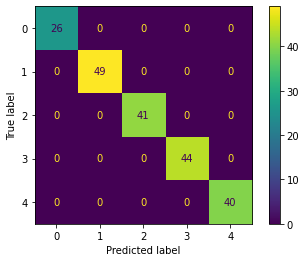

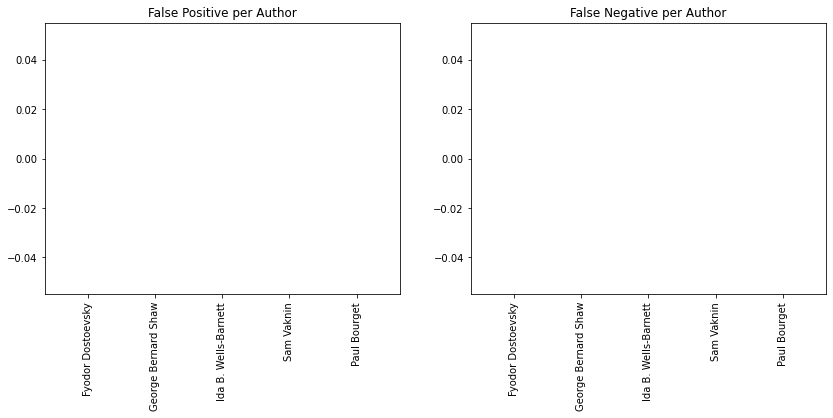

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.pipeline import Pipeline
from sklearn.naive_bayes import MultinomialNB
from mlxtend.evaluate.bias_variance_decomp import bias_variance_decomp

predicted = gs_clf.predict(X_test)
print("Testing precision: " + str(gs_clf.score(X_test, y_test_labels)))

# estimate bias and variance https://machinelearningmastery.com/calculate-the-bias-variance-trade-off/
_, bias, var = bias_variance_decomp(deepcopy(gs_clf), X_train, y_train_labels, X_test, y_test_labels, num_rounds=2)
print('Bias: %.3f' % bias)
print('Variance: %.3f' % var)

cm = metrics.confusion_matrix(y_test_labels, predicted)
metrics.plot_confusion_matrix(gs_clf, X_test, y_test_labels)

# False Negative per Author
group_by_true_label = np.sum(cm, axis=1) - np.diag(cm)
# False Positive per Author
group_by_prediction = np.sum(cm, axis=0) - np.diag(cm)

print()
for i in range(len(author_Names)):
  print(str(group_by_prediction[i]) + ' texts has been wrongly classified as ' + author_Names[i])
for i in range(len(author_Names)):
  print(str(group_by_true_label[i]) + ' of ' + author_Names[i] + ' texts has been wrongly classified')

print()
print(author_Names)
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(14, 5))
plt.subplot(1, 2, 1)
plt.bar(range(len(author_Names)), group_by_prediction)
plt.title('False Positive per Author')
plt.xticks(range(len(author_Names)), author_Names, rotation=90)

plt.subplot(1, 2, 2)
plt.bar(range(len(author_Names)), group_by_true_label)
plt.title('False Negative per Author')
plt.xticks(range(len(author_Names)), author_Names, rotation=90)
plt.show()

Most frequent words


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


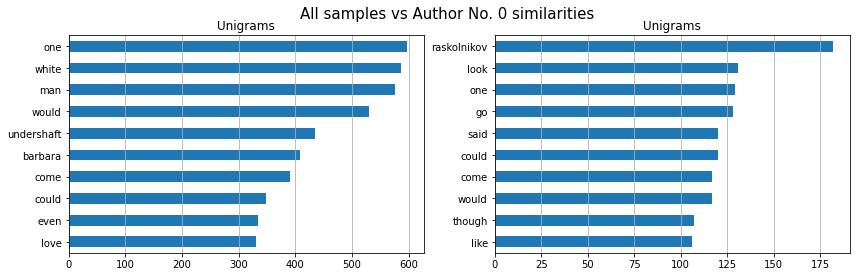

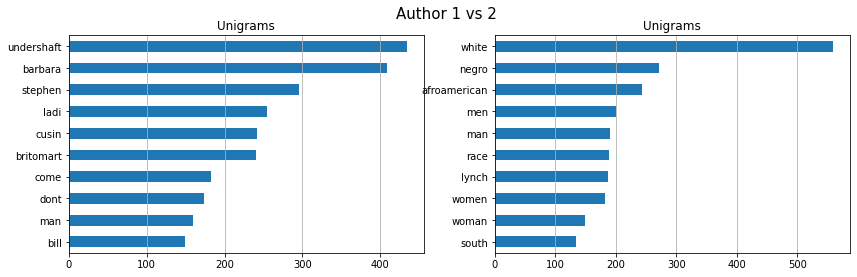

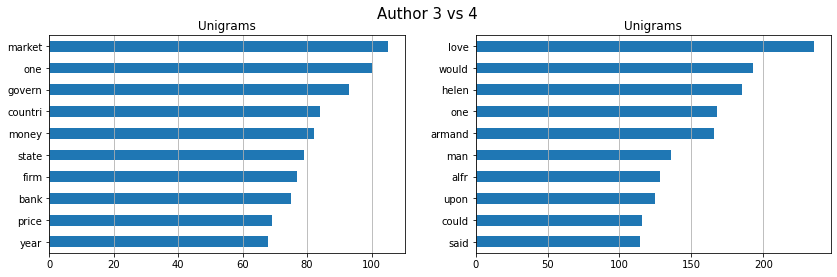

In [ ]:
# This code is copied from the FeatureEngineering notebook provided in class with change of variables

# unigrams
nltk.download('punkt')
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(14, 4))
fig.suptitle("All samples vs Author No. 0 similarities", fontsize=15)
top=10

lst_tokens = nltk.tokenize.word_tokenize(' '.join(np.array(df['Sample'])))
dic_words_freq = nltk.FreqDist(lst_tokens)
dtf_uni = pd.DataFrame(dic_words_freq.most_common(), 
                       columns=["Word","Freq"])
dtf_uni.set_index("Word").iloc[:top,:].sort_values(by="Freq").plot(
                  kind="barh", title="Unigrams", ax=ax[0], 
                  legend=False).grid(axis='x')
ax[0].set(ylabel=None)

lst_tokens = nltk.tokenize.word_tokenize(' '.join(np.array(df.loc[df['Author'] == author_Names[0]]['Sample'])))
dic_words_freq = nltk.FreqDist(lst_tokens)
dtf_uni = pd.DataFrame(dic_words_freq.most_common(), 
                       columns=["Word","Freq"])
dtf_uni.set_index("Word").iloc[:top,:].sort_values(by="Freq").plot(
                  kind="barh", title="Unigrams", ax=ax[1], 
                  legend=False).grid(axis='x')
ax[1].set(ylabel=None)

fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(14, 4))
fig.suptitle("Author 1 vs 2", fontsize=15)

lst_tokens = nltk.tokenize.word_tokenize(' '.join(np.array(df.loc[df['Author'] == author_Names[1]]['Sample'])))
dic_words_freq = nltk.FreqDist(lst_tokens)
dtf_uni = pd.DataFrame(dic_words_freq.most_common(), 
                       columns=["Word","Freq"])
dtf_uni.set_index("Word").iloc[:top,:].sort_values(by="Freq").plot(
                  kind="barh", title="Unigrams", ax=ax[0], 
                  legend=False).grid(axis='x')
ax[0].set(ylabel=None)
lst_tokens = nltk.tokenize.word_tokenize(' '.join(np.array(df.loc[df['Author'] == author_Names[2]]['Sample'])))
dic_words_freq = nltk.FreqDist(lst_tokens)
dtf_uni = pd.DataFrame(dic_words_freq.most_common(), 
                       columns=["Word","Freq"])
dtf_uni.set_index("Word").iloc[:top,:].sort_values(by="Freq").plot(
                  kind="barh", title="Unigrams", ax=ax[1], 
                  legend=False).grid(axis='x')
ax[1].set(ylabel=None)


fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(14, 4))
fig.suptitle("Author 3 vs 4", fontsize=15)

lst_tokens = nltk.tokenize.word_tokenize(' '.join(np.array(df.loc[df['Author'] == author_Names[3]]['Sample'])))
dic_words_freq = nltk.FreqDist(lst_tokens)
dtf_uni = pd.DataFrame(dic_words_freq.most_common(), 
                       columns=["Word","Freq"])
dtf_uni.set_index("Word").iloc[:top,:].sort_values(by="Freq").plot(
                  kind="barh", title="Unigrams", ax=ax[0], 
                  legend=False).grid(axis='x')
ax[0].set(ylabel=None)
lst_tokens = nltk.tokenize.word_tokenize(' '.join(np.array(df.loc[df['Author'] == author_Names[4]]['Sample'])))
dic_words_freq = nltk.FreqDist(lst_tokens)
dtf_uni = pd.DataFrame(dic_words_freq.most_common(), 
                       columns=["Word","Freq"])
dtf_uni.set_index("Word").iloc[:top,:].sort_values(by="Freq").plot(
                  kind="barh", title="Unigrams", ax=ax[1], 
                  legend=False).grid(axis='x')
ax[1].set(ylabel=None)

plt.show()


**Before treating the erros**

Authors 0 and 2 has no FN, the reason maybe is because they have words that are not common and unique to them in their lists of the most frequent word. For example, author 0 has 'raskolnikov' and author 2 has 'afroamerican' and 'gutenbergtm'.

That could mean that the model is biased towards authors that use unique words, and espicially Author 2.

**After treating the errors**

The models show 100% precision and has no wrong predictions.

Let's see the samples that threw off the model for further analyzation.

In [ ]:
for input, prediction, label in zip(X_test, predicted, y_test_labels):
  if prediction != label:
    print(input[:70] + '... has been classified as ', prediction, 'and should be ', label) 

    fig, ax = plt.subplots()
    fig.suptitle("Classified as " + str(prediction) + " and should be " + str(label), fontsize=15)

    lst_tokens = nltk.tokenize.word_tokenize(input)
    dic_words_freq = nltk.FreqDist(lst_tokens)
    dtf_uni = pd.DataFrame(dic_words_freq.most_common(), 
                          columns=["Word","Freq"])
    dtf_uni.set_index("Word").iloc[:top,:].sort_values(by="Freq").plot(
                      kind="barh", title="Unigrams", ax=ax, 
                      legend=False).grid(axis='x')
    ax.set(ylabel=None)

**Before treating the erros**

We can see that False Positives of Author 2 have some frequent words that are the same of the top frequent words for Author 2. Also they use words like 'gutenberg' which is a little unique for Author 2.

**After treating the erros**

The model shows 100% precision and has no wrong predictions.

# 6. Verification

>  Reduce the number of words per document if the accuracy is too high and then repeat the above steps.

In [ ]:
X_train_less = np.array([' '.join(tokenizer.tokenize(sample)[:-80]) for sample in X_train])
X_test_less = np.array([' '.join(tokenizer.tokenize(sample)[:-80]) for sample in X_test])

parameters_less = {
    # SVM
    # 'clf__kernel': ['rbf', 'linear'],
    # 'clf__gamma': [1e-3, 1e-4],
    # 'clf__C': [1, 10, 100, 1000],
    # KNN
    # 'clf__n_neighbors': list(range(1,36))
    # DTree
    # 'clf__criterion': ['gini', 'entropy'],
    # 'clf__max_depth': [2,4,6,8,10,12]
    # 'tran2__use_idf': (True, False),
    'tran1__ngram_range': [(1, 1), (1, 2), (2,2)],
    # 'clf__alpha': (1e-2, 1e-3)
}

scorer_less = metrics.make_scorer(metrics.precision_score, average = 'micro')
gs_clf_less = GridSearchCV(deepcopy(models[19]), parameters_less, cv=10, n_jobs=-1, scoring=scorer_less)

# Fit and evaluate
gs_clf_less = gs_clf_less.fit(X_train_less, y_train_labels)
print("Training precision: " + str(gs_clf_less.score(X_train_less, y_train_labels)))
print("Mean cross-validation precision: " + str(gs_clf_less.best_score_))

print()
print('Best Parameters')
print('----------------')
for param_name in sorted(parameters_less.keys()):
  print("%s: %r" % (param_name, gs_clf_less.best_params_[param_name]))

print()
print('Report')
print('-------')
print(metrics.classification_report(y_train_labels, gs_clf_less.predict(X_train)))

/usr/local/lib/python3.7/dist-packages/joblib/externals/loky/process_executor.py:691: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  "timeout or by a memory leak.", UserWarning


Training precision: 0.86875
Mean cross-validation precision: 0.40499999999999997

Best Parameters
----------------
tran1__ngram_range: (1, 1)

Report
-------
              precision    recall  f1-score   support

           0       0.44      0.79      0.56       174
           1       0.71      0.60      0.65       151
           2       0.69      0.92      0.79       159
           3       0.79      0.43      0.56       156
           4       0.65      0.26      0.37       160

    accuracy                           0.60       800
   macro avg       0.66      0.60      0.59       800
weighted avg       0.65      0.60      0.58       800



/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (5) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Testing precision: 0.465


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (5) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (5) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Bias: 0.715
Variance: 0.372

55 texts has been wrongly classified as Fyodor Dostoevsky
21 texts has been wrongly classified as George Bernard Shaw
19 texts has been wrongly classified as Ida B. Wells-Barnett
4 texts has been wrongly classified as Sam Vaknin
8 texts has been wrongly classified as Paul Bourget
11 of Fyodor Dostoevsky texts has been wrongly classified
22 of George Bernard Shaw texts has been wrongly classified
10 of Ida B. Wells-Barnett texts has been wrongly classified
31 of Sam Vaknin texts has been wrongly classified
33 of Paul Bourget texts has been wrongly classified

['Fyodor Dostoevsky', 'George Bernard Shaw', 'Ida B. Wells-Barnett', 'Sam Vaknin', 'Paul Bourget']


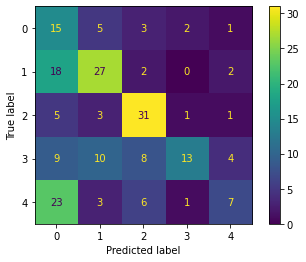

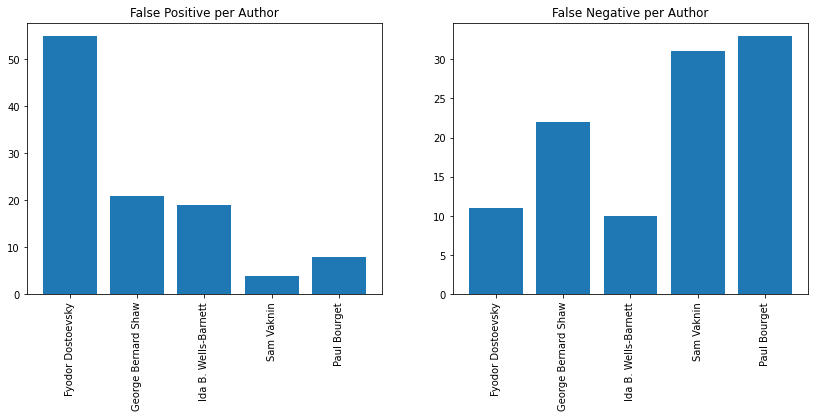

In [ ]:
predicted = gs_clf_less.predict(X_test_less)
print("Testing precision: " + str(gs_clf_less.score(X_test_less, y_test_labels)))

# estimate bias and variance https://machinelearningmastery.com/calculate-the-bias-variance-trade-off/
_, bias, var = bias_variance_decomp(deepcopy(gs_clf_less), X_train_less, y_train_labels, X_test_less, y_test_labels, num_rounds=2)
print('Bias: %.3f' % bias)
print('Variance: %.3f' % var)

cm = metrics.confusion_matrix(y_test_labels, predicted)
metrics.plot_confusion_matrix(gs_clf_less, X_test_less, y_test_labels)

# False Negative per Author
group_by_true_label = np.sum(cm, axis=1) - np.diag(cm)
# False Positive per Author
group_by_prediction = np.sum(cm, axis=0) - np.diag(cm)

print()
for i in range(len(author_Names)):
  print(str(group_by_prediction[i]) + ' texts has been wrongly classified as ' + author_Names[i])
for i in range(len(author_Names)):
  print(str(group_by_true_label[i]) + ' of ' + author_Names[i] + ' texts has been wrongly classified')

print()
print(author_Names)
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(14, 5))
plt.subplot(1, 2, 1)
plt.bar(range(len(author_Names)), group_by_prediction)
plt.title('False Positive per Author')
plt.xticks(range(len(author_Names)), author_Names, rotation=90)

plt.subplot(1, 2, 2)
plt.bar(range(len(author_Names)), group_by_true_label)
plt.title('False Negative per Author')
plt.xticks(range(len(author_Names)), author_Names, rotation=90)
plt.show()

Having less words caused the model to over fit. It might have high accuracy in training but when it comes to testing, the percentage is low.

Most frequent words


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


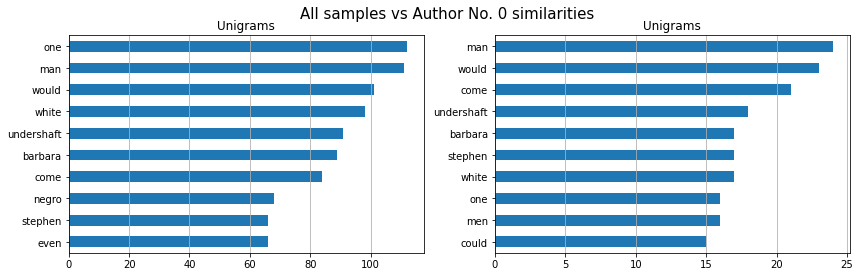

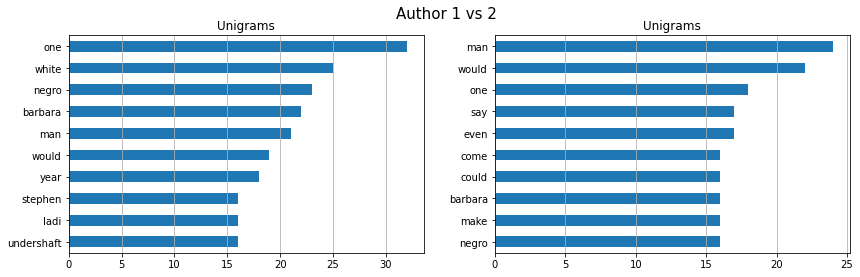

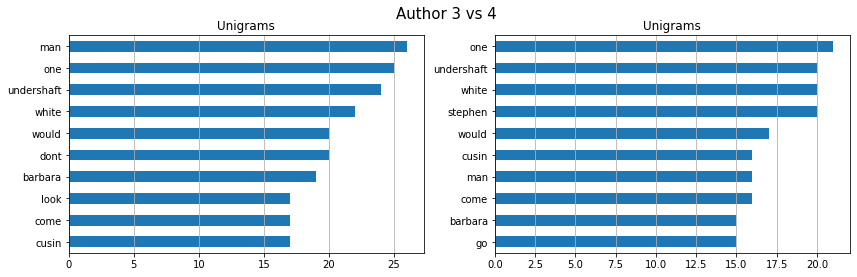

In [ ]:
# This code is copied from the FeatureEngineering notebook provided in class with change of variables

# unigrams
nltk.download('punkt')
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(14, 4))
fig.suptitle("All samples vs Author No. 0 similarities", fontsize=15)
top=10

lst_tokens = nltk.tokenize.word_tokenize(' '.join(np.append(X_train_less, X_test_less)))
dic_words_freq = nltk.FreqDist(lst_tokens)
dtf_uni = pd.DataFrame(dic_words_freq.most_common(), 
                       columns=["Word","Freq"])
dtf_uni.set_index("Word").iloc[:top,:].sort_values(by="Freq").plot(
                  kind="barh", title="Unigrams", ax=ax[0], 
                  legend=False).grid(axis='x')
ax[0].set(ylabel=None)

lst_tokens = nltk.tokenize.word_tokenize(' '.join(np.append(X_train_less, X_test_less)[df['Author'] == author_Names[0]]))
dic_words_freq = nltk.FreqDist(lst_tokens)
dtf_uni = pd.DataFrame(dic_words_freq.most_common(), 
                       columns=["Word","Freq"])
dtf_uni.set_index("Word").iloc[:top,:].sort_values(by="Freq").plot(
                  kind="barh", title="Unigrams", ax=ax[1], 
                  legend=False).grid(axis='x')
ax[1].set(ylabel=None)

fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(14, 4))
fig.suptitle("Author 1 vs 2", fontsize=15)

lst_tokens = nltk.tokenize.word_tokenize(' '.join(np.append(X_train_less, X_test_less)[df['Author'] == author_Names[1]]))
dic_words_freq = nltk.FreqDist(lst_tokens)
dtf_uni = pd.DataFrame(dic_words_freq.most_common(), 
                       columns=["Word","Freq"])
dtf_uni.set_index("Word").iloc[:top,:].sort_values(by="Freq").plot(
                  kind="barh", title="Unigrams", ax=ax[0], 
                  legend=False).grid(axis='x')
ax[0].set(ylabel=None)
lst_tokens = nltk.tokenize.word_tokenize(' '.join(np.append(X_train_less, X_test_less)[df['Author'] == author_Names[2]]))
dic_words_freq = nltk.FreqDist(lst_tokens)
dtf_uni = pd.DataFrame(dic_words_freq.most_common(), 
                       columns=["Word","Freq"])
dtf_uni.set_index("Word").iloc[:top,:].sort_values(by="Freq").plot(
                  kind="barh", title="Unigrams", ax=ax[1], 
                  legend=False).grid(axis='x')
ax[1].set(ylabel=None)


fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(14, 4))
fig.suptitle("Author 3 vs 4", fontsize=15)

lst_tokens = nltk.tokenize.word_tokenize(' '.join(np.append(X_train_less, X_test_less)[df['Author'] == author_Names[3]]))
dic_words_freq = nltk.FreqDist(lst_tokens)
dtf_uni = pd.DataFrame(dic_words_freq.most_common(), 
                       columns=["Word","Freq"])
dtf_uni.set_index("Word").iloc[:top,:].sort_values(by="Freq").plot(
                  kind="barh", title="Unigrams", ax=ax[0], 
                  legend=False).grid(axis='x')
ax[0].set(ylabel=None)
lst_tokens = nltk.tokenize.word_tokenize(' '.join(np.append(X_train_less, X_test_less)[df['Author'] == author_Names[4]]))
dic_words_freq = nltk.FreqDist(lst_tokens)
dtf_uni = pd.DataFrame(dic_words_freq.most_common(), 
                       columns=["Word","Freq"])
dtf_uni.set_index("Word").iloc[:top,:].sort_values(by="Freq").plot(
                  kind="barh", title="Unigrams", ax=ax[1], 
                  legend=False).grid(axis='x')
ax[1].set(ylabel=None)

plt.show()

**Examples that threw off the machine**

experienc thrill amor emot restor timid desir wife person alway overwh... has been classified as  0 and should be  4
britomart must get money somehow stephen cannot take money rather go l... has been classified as  0 and should be  1
conscienc freedomal mani unreal apparit mani bodiless shadow indisput ... has been classified as  0 and should be  4
comfort one anoth undershaft startl secularist least world contrari co... has been classified as  0 and should be  1
reset unwind unload share price manipul opaqu transact outlandish pay ... has been classified as  1 and should be  3
appear characterist time togeth peculiar everyth seem almost new first... has been classified as  0 and should be  4
real anger gleam fierc eye shout top voicey ran away bed ive look sofa... has been classified as  2 and should be  0
would call gounod music exactli monsieur de quern rather ladi experi f... has been classified as  0 and should be  4
decid june whether retain auditor browder initi class action law

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  """


noth lift seven millston man neck money spirit cannot soar millston li... has been classified as  0 and should be  1
ohio accus afroamerican rape told husband absenc 1888 stump state proh... has been classified as  0 and should be  2
paig unction ye miss ive got piec valu that peac passeth hall hannerst... has been classified as  0 and should be  1
poor rummi mitchen realli hurt she old bill contemptu like id give ana... has been classified as  0 and should be  1
cours mother ladi britomart cours want someth much everyday matterofco... has been classified as  0 and should be  1
subdu lust sooner later forc crisi know form come issu june 4 _memphi ... has been classified as  1 and should be  2
dress varieg friez materi huge red rose bloom left breast she luxuri w... has been classified as  2 and should be  4
discourag twing remors thet aw rawt knaow nathink pasnl naow mellic lo... has been classified as  0 and should be  1
cant go leav us major barbara quietli father come undershaft com

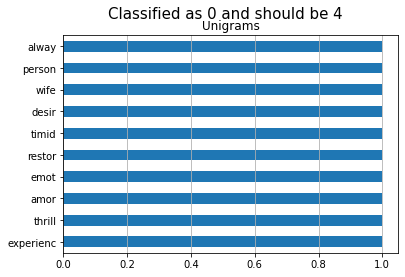

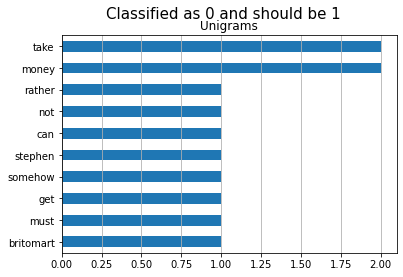

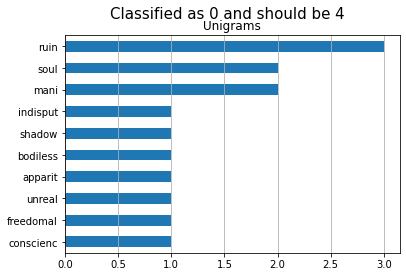

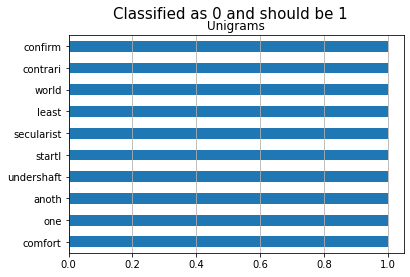

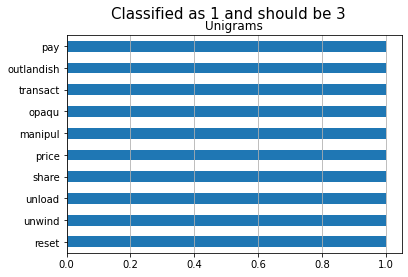

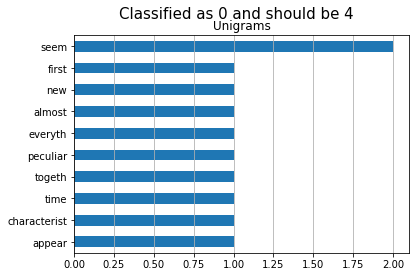

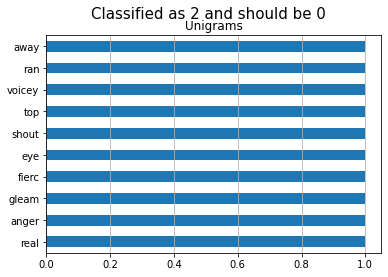

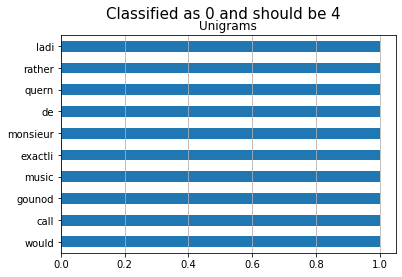

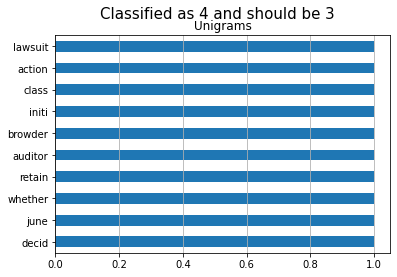

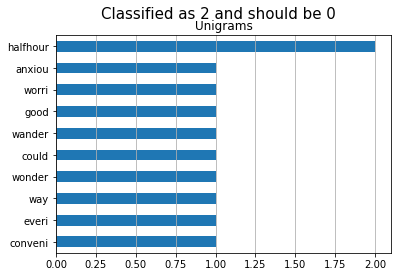

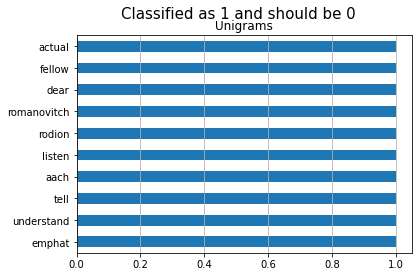

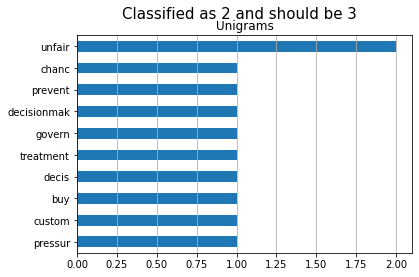

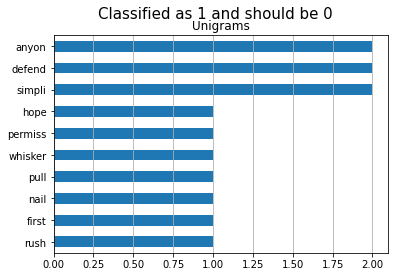

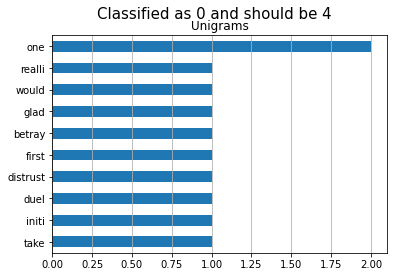

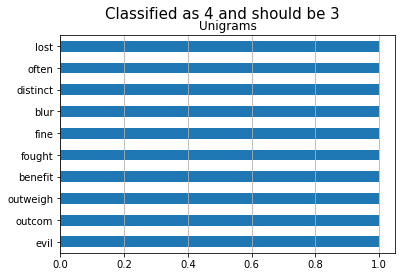

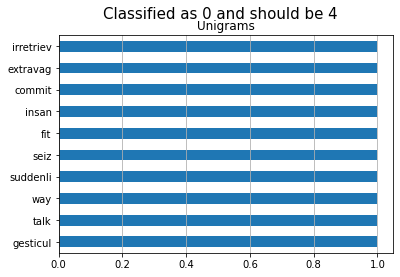

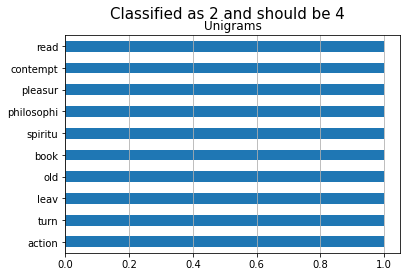

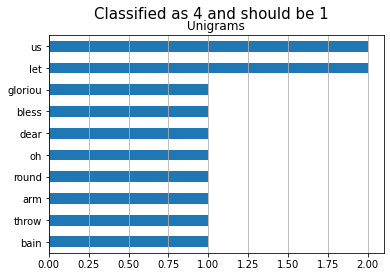

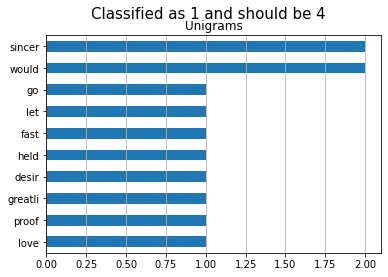

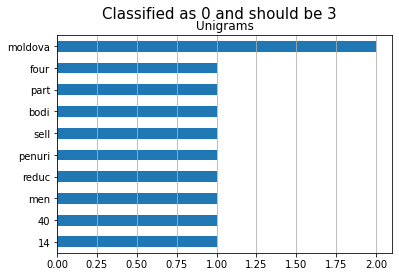

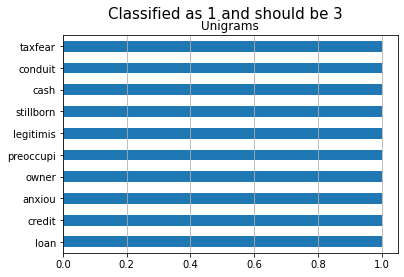

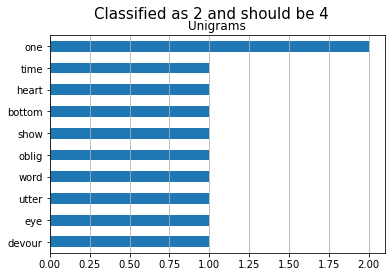

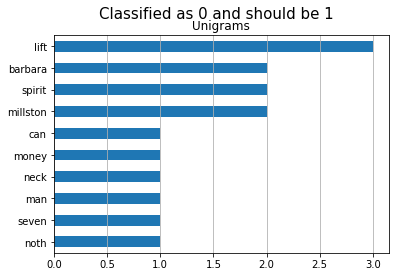

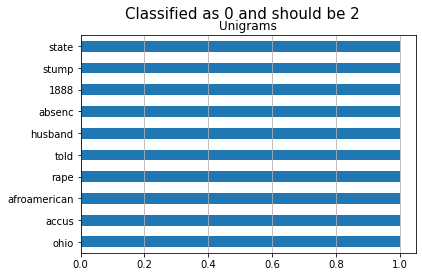

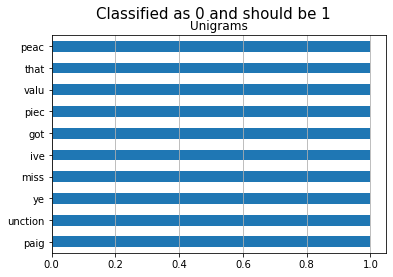

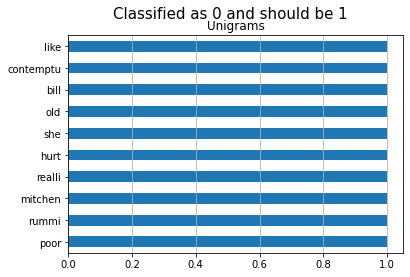

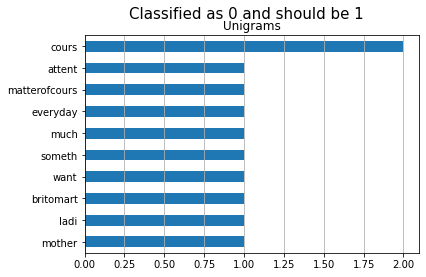

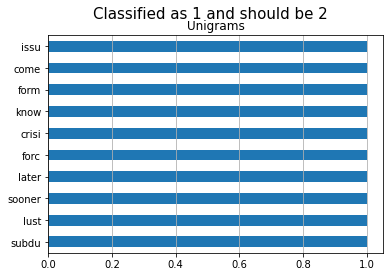

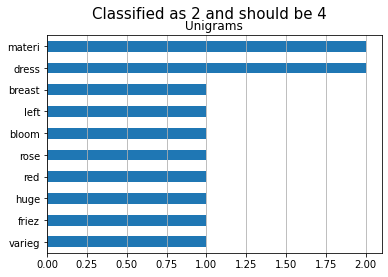

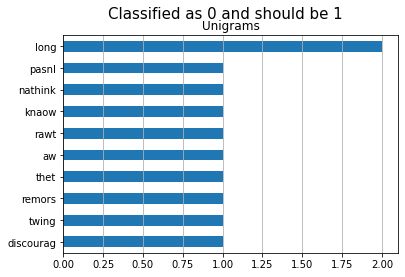

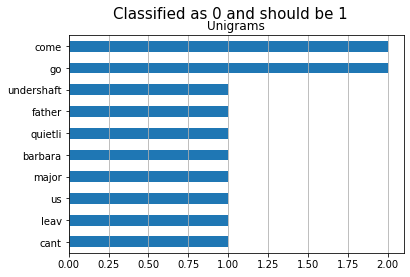

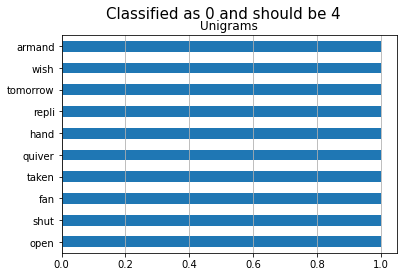

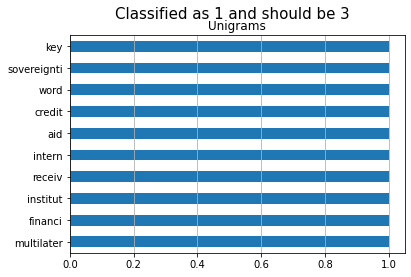

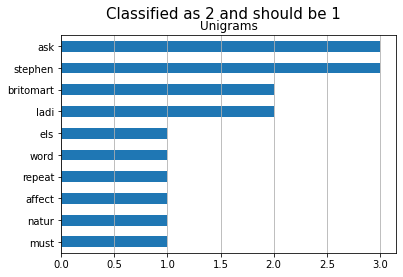

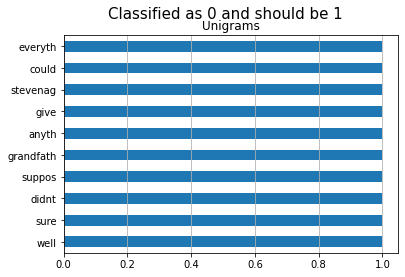

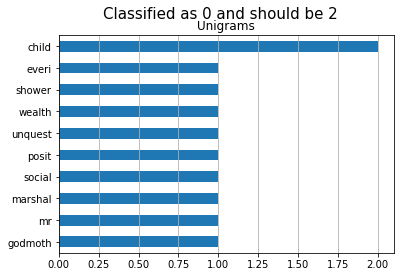

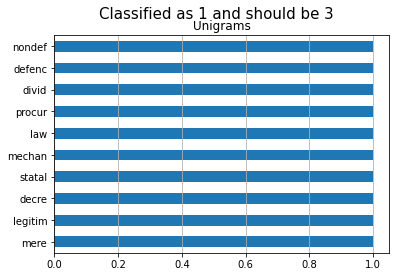

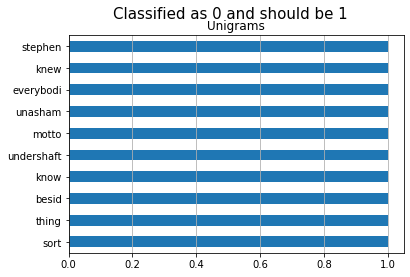

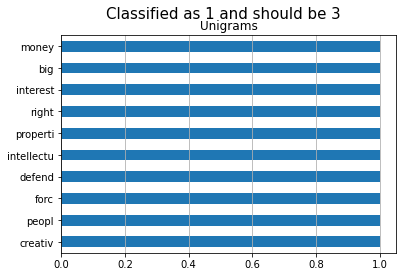

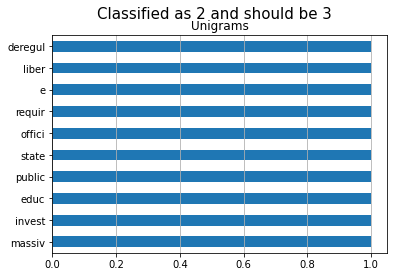

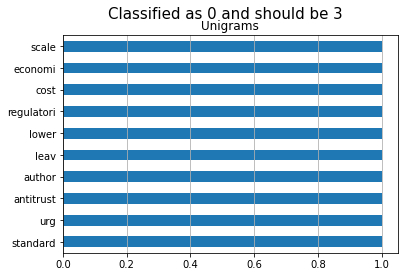

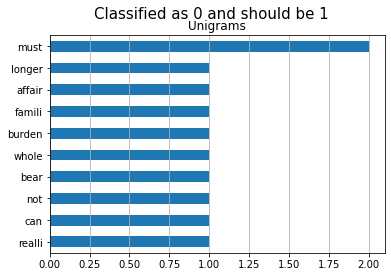

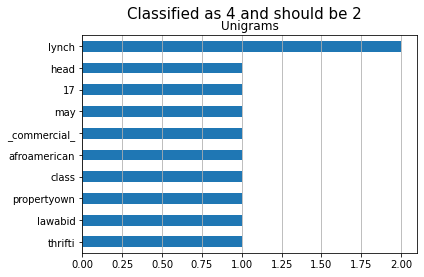

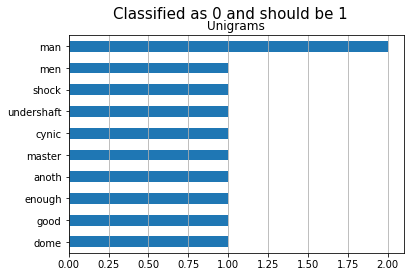

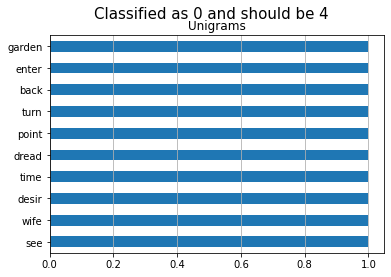

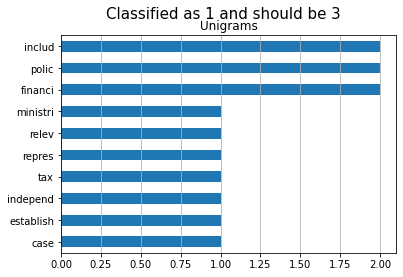

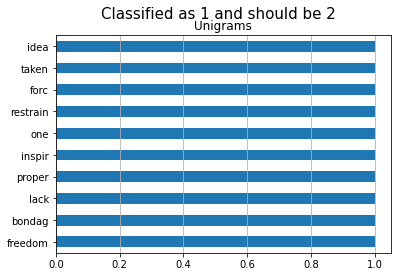

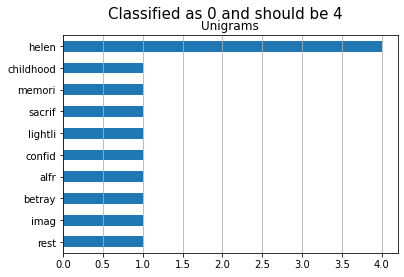

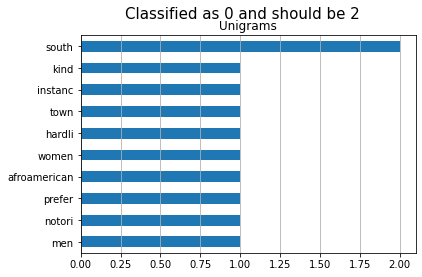

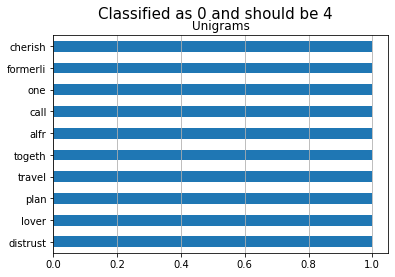

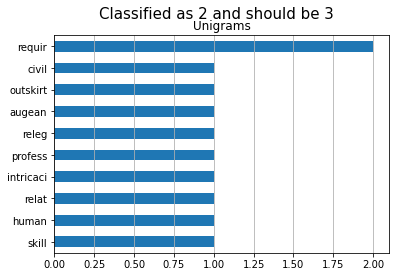

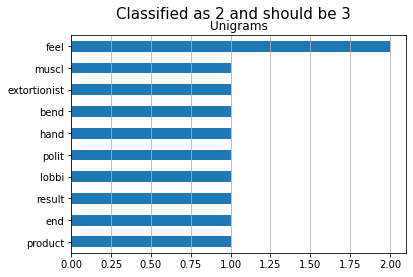

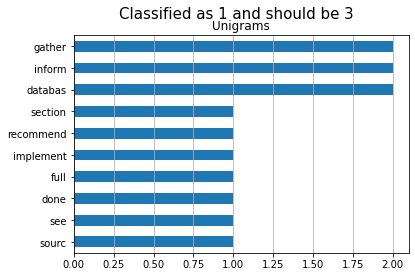

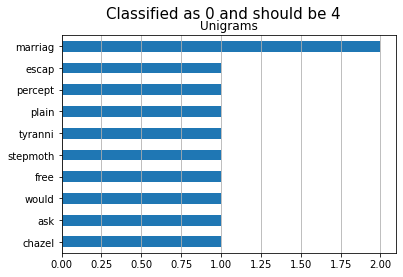

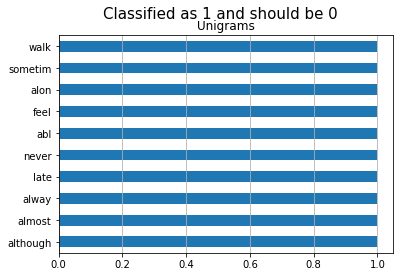

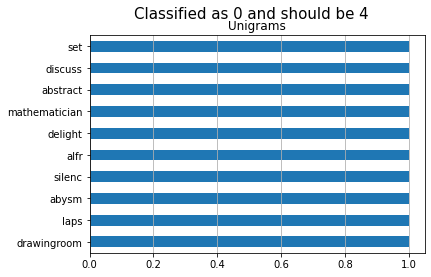

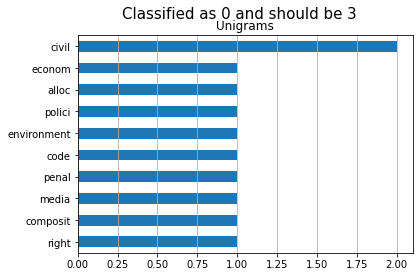

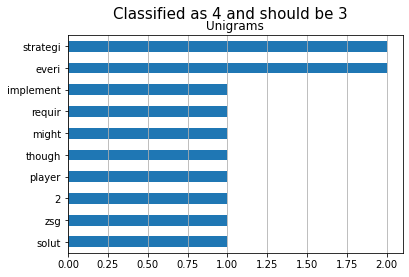

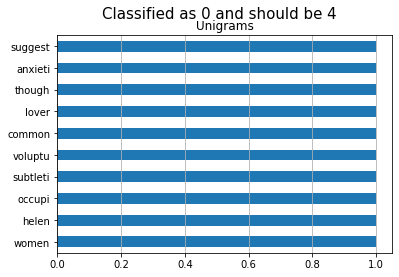

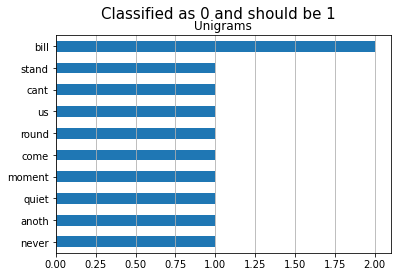

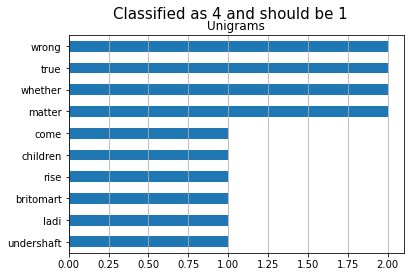

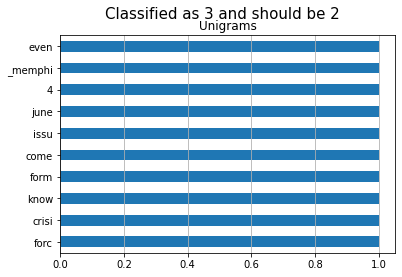

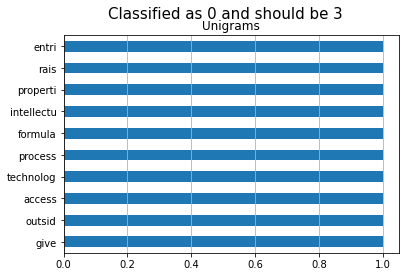

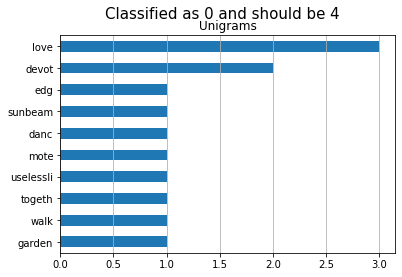

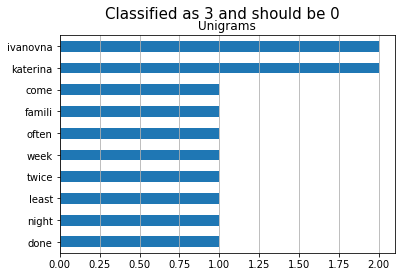

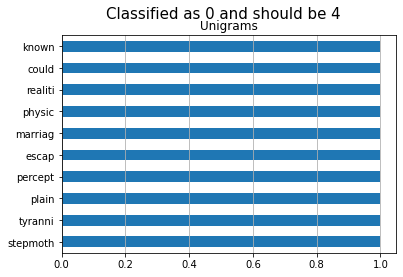

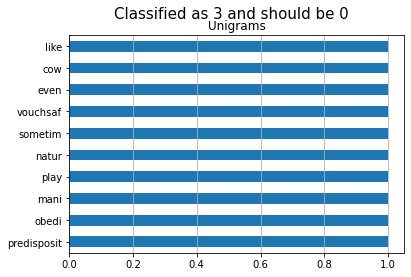

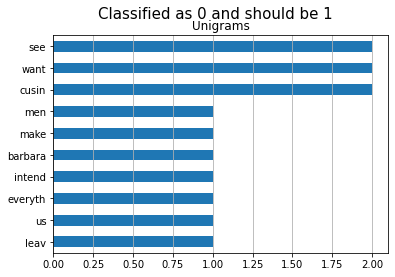

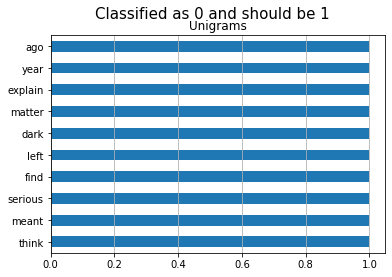

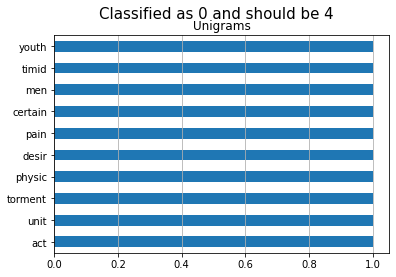

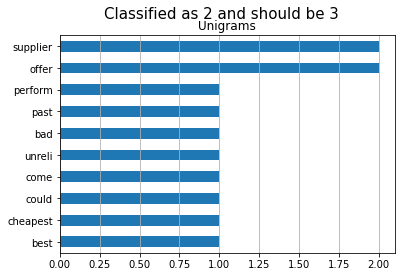

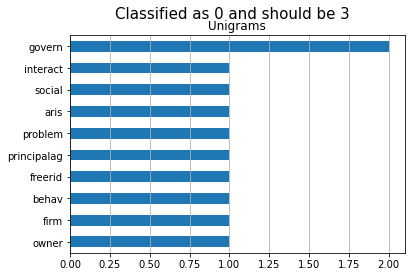

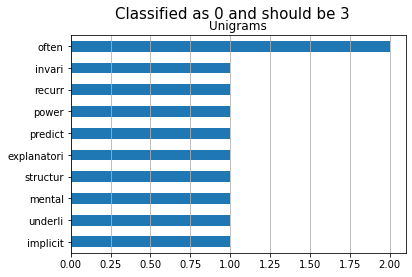

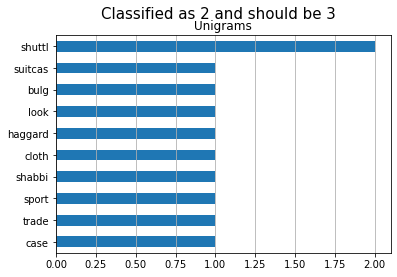

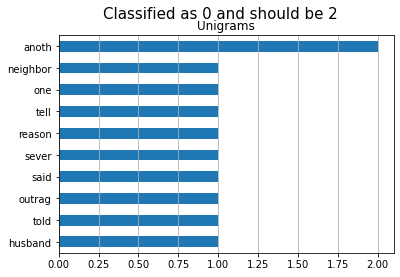

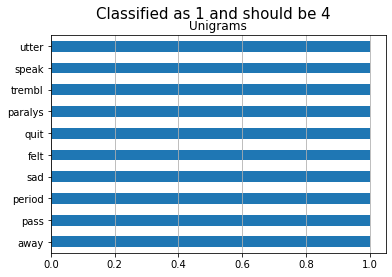

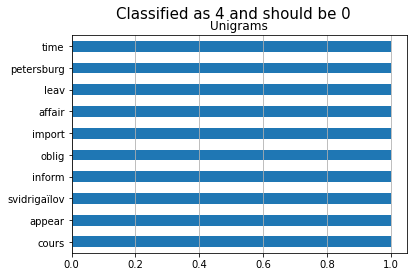

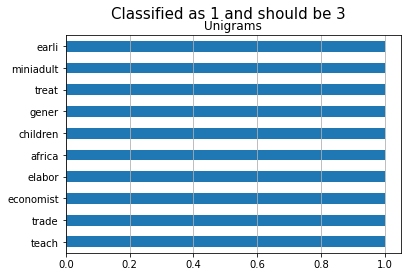

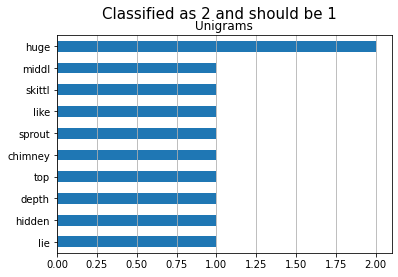

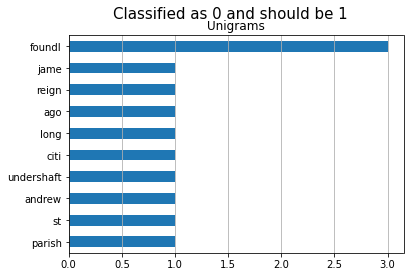

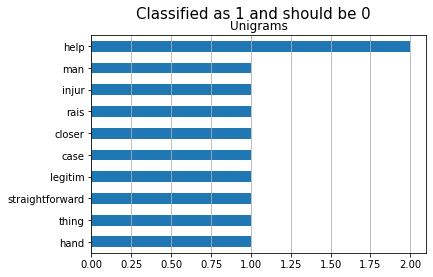

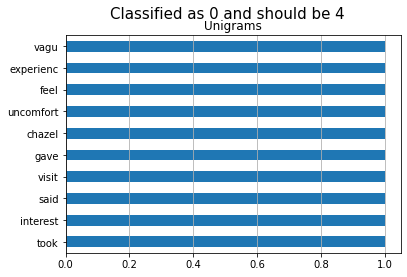

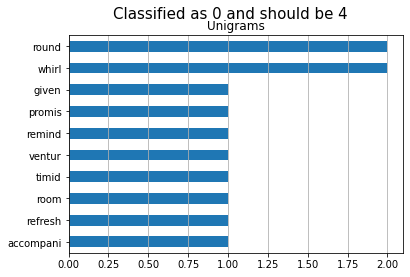

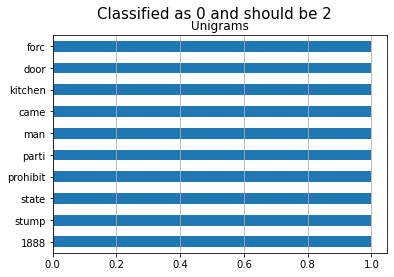

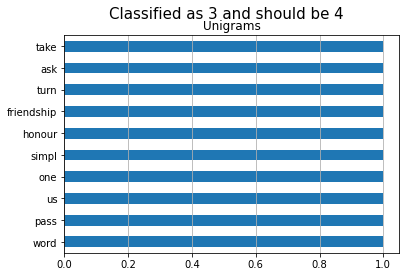

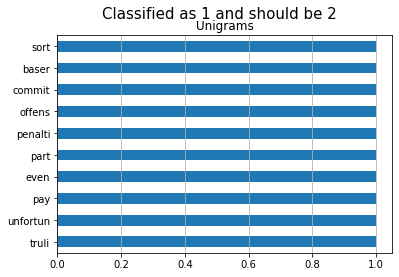

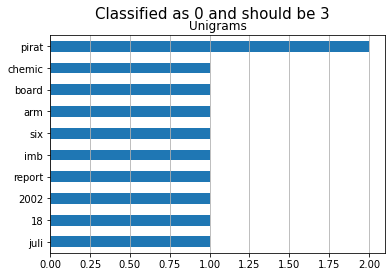

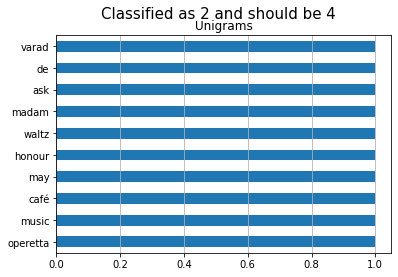

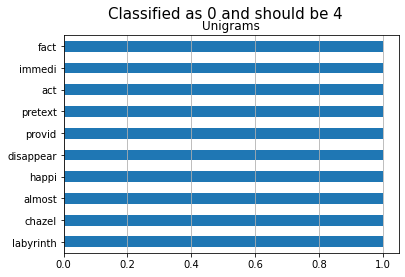

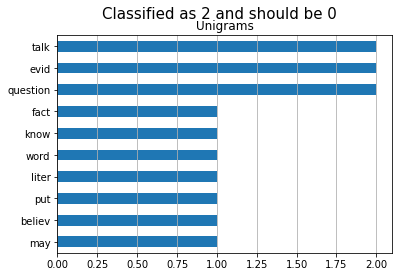

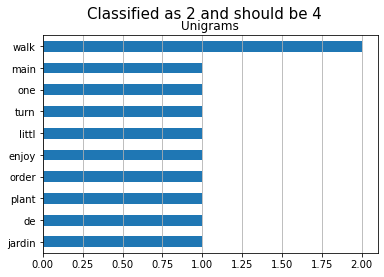

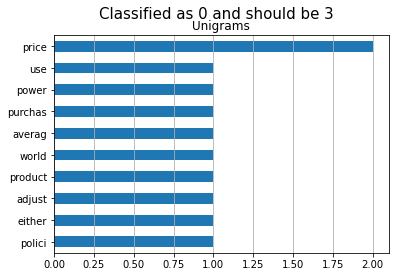

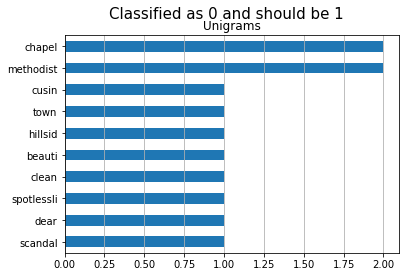

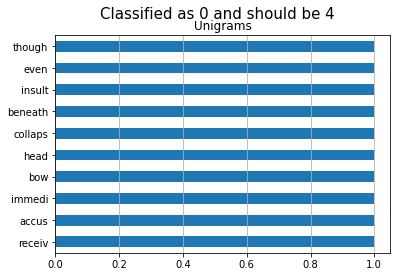

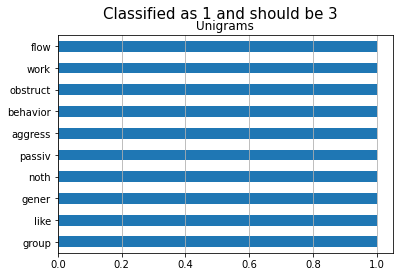

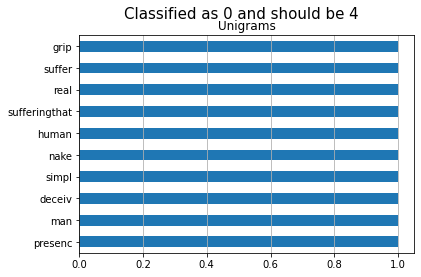

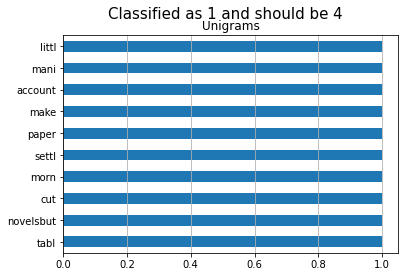

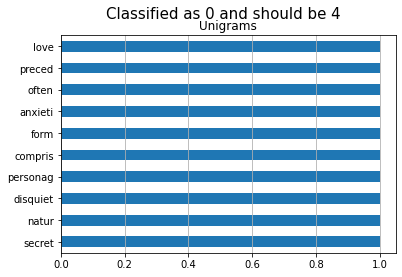

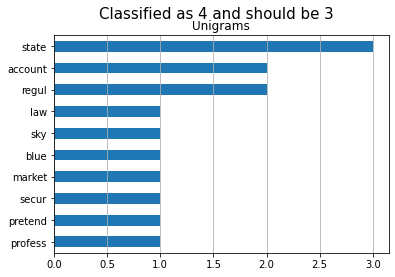

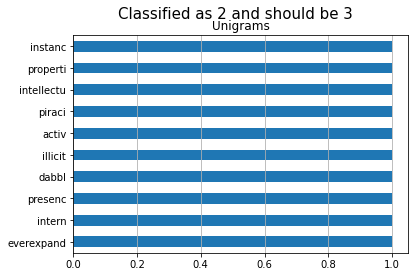

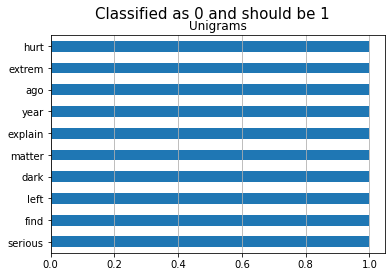

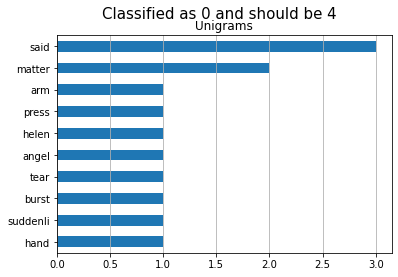

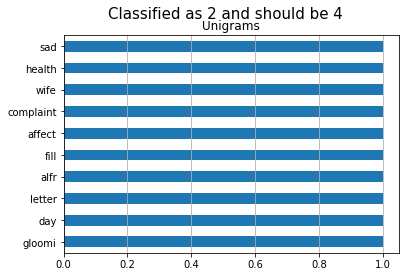

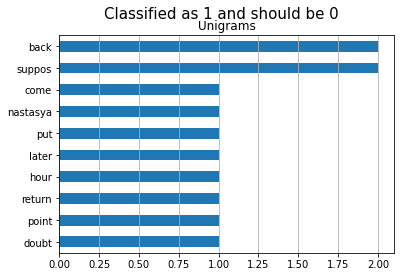

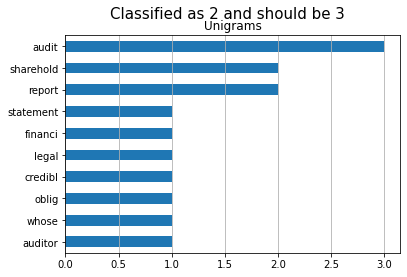

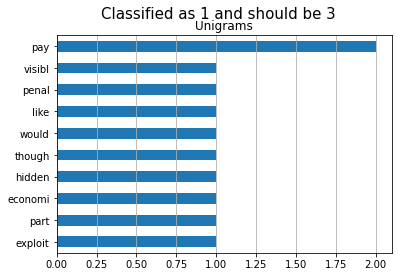

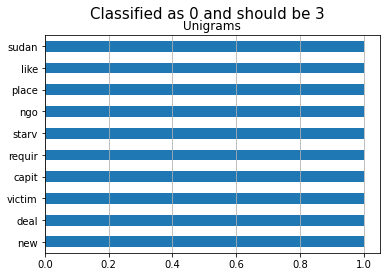

In [ ]:
for input, prediction, label in zip(X_test_less, predicted, y_test_labels):
  if prediction != label:
    print(input[:70] + '... has been classified as ', prediction, 'and should be ', label) 

    fig, ax = plt.subplots()
    fig.suptitle("Classified as " + str(prediction) + " and should be " + str(label), fontsize=15)

    lst_tokens = nltk.tokenize.word_tokenize(input)
    dic_words_freq = nltk.FreqDist(lst_tokens)
    dtf_uni = pd.DataFrame(dic_words_freq.most_common(), 
                          columns=["Word","Freq"])
    dtf_uni.set_index("Word").iloc[:top,:].sort_values(by="Freq").plot(
                      kind="barh", title="Unigrams", ax=ax, 
                      legend=False).grid(axis='x')
    ax.set(ylabel=None)

Now the most frequent words for each other have more common words and we belive that threw off the machine.

The bias and variance are higher specially the bias. That is because the model is underfitted.